# 데이터 탐색 연습
- 전력데이터를 가지고 간단한 분석 실행
- 데이터 시각화 (scatter plot, histogram, heatmap)
- correlation
- outlier detection and removal


### 데이터
- 전력판매량(시도별/용도별) 액셀 파일 https://goo.gl/Cx8Rzw
- 위 자료는 전력거래소에서 받은 자료임

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install xlrd==1.2.0   # package for excel read (pandas 에 필요)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


데이터 읽기
--

In [3]:
!curl -L https://goo.gl/Cx8Rzw -o 시도별_용도별.xls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   167    0   167    0     0    148      0 --:--:--  0:00:01 --:--:--   148
100   340  100   340    0     0    243      0  0:00:01  0:00:01 --:--:--   243
100   534    0   534    0     0    334      0 --:--:--  0:00:01 --:--:--  3401
100 17920  100 17920    0     0   9377      0  0:00:01  0:00:01 --:--:--  9377


In [4]:
power_data = pd.read_excel("시도별_용도별.xls")
print(power_data.shape)

(19, 28)


In [5]:
power_data.head()

구분       주거용      공공용      서비스업     업무용합계     농림어업      광업       제조업  \
0  강원   1940933  1400421   6203749   7604170   607139  398287   6002286   
1  개성         0        0         0         0        0       0         0   
2  경기  16587710  5533662  33434551  38968213  2371347  317263  56603327   
3  경남   4260988  1427560   8667737  10095297  2141813   95989  18053778   
4  경북   3302463  1578115   8487402  10065517  1747462  224568  30115601   

     식료품제조    섬유,의류  ...     기타기계    사무기기     전기기기     영상,음향      자동차  \
0   546621    13027  ...    35063    2019    38062     43986   113448   
1        0        0  ...        0       0        0         0        0   
2  2544420  2109963  ...  3613798  317244  1040171  24519644  2977165   
3   932743   346974  ...  1902913    8070   924235    534196  2156059   
4   566071  3780171  ...   782570   14468   750786   4174971  2356890   

      기타운송    가구및기타    재생재료     산업용합계         합계  
0   108629    12872    3418   7007712   16552816  
1        0        0       0         0          0  
2    67594  1833112  133041  59291937  114847859  
3  2048646   262523   47662  20291580   34647864  
4   123935    60280   77104  32087631   45455611  

[5 rows x 28 columns]

In [6]:
type(power_data), power_data.columns, power_data.index

(pandas.core.frame.DataFrame,
 Index(['구분', '주거용', '공공용', '서비스업', '업무용합계', '농림어업', '광업', '제조업', '식료품제조',
        '섬유,의류', '목재,나무', '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속',
        '조립금속', '기타기계', '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료',
        '산업용합계', '합계'],
       dtype='object'),
 RangeIndex(start=0, stop=19, step=1))

In [7]:
power_data.info(), power_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      19 non-null     object
 1   주거용     19 non-null     int64 
 2   공공용     19 non-null     int64 
 3   서비스업    19 non-null     int64 
 4   업무용합계   19 non-null     int64 
 5   농림어업    19 non-null     int64 
 6   광업      19 non-null     int64 
 7   제조업     19 non-null     int64 
 8   식료품제조   19 non-null     int64 
 9   섬유,의류   19 non-null     int64 
 10  목재,나무   19 non-null     int64 
 11  펄프,종이   19 non-null     int64 
 12  출판,인쇄   19 non-null     int64 
 13  석유,화확   19 non-null     int64 
 14  의료,광학   19 non-null     int64 
 15  요업      19 non-null     int64 
 16  1차금속    19 non-null     int64 
 17  조립금속    19 non-null     int64 
 18  기타기계    19 non-null     int64 
 19  사무기기    19 non-null     int64 
 20  전기기기    19 non-null     int64 
 21  영상,음향   19 non-null     int64 
 22  자동차     19 non-null     int6

(None,
                 주거용           공공용          서비스업         업무용합계          농림어업  \
 count  1.900000e+01  1.900000e+01  1.900000e+01  1.900000e+01  1.900000e+01   
 mean   6.899673e+06  2.410981e+06  1.451057e+07  1.692155e+07  1.650270e+06   
 std    1.457381e+07  4.957221e+06  3.031208e+07  3.526148e+07  3.464035e+06   
 min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
 25%    1.906912e+06  6.959615e+05  3.802654e+06  4.524926e+06  7.203850e+04   
 50%    2.326183e+06  1.089613e+06  5.690659e+06  6.654683e+06  6.071390e+05   
 75%    4.058920e+06  1.413990e+06  8.034786e+06  9.476781e+06  1.837764e+06   
 max    6.457642e+07  2.220411e+07  1.347485e+08  1.569527e+08  1.537399e+07   
 
                  광업           제조업         식료품제조         섬유,의류         목재,나무  \
 count  1.900000e+01  1.900000e+01  1.900000e+01  1.900000e+01  1.900000e+01   
 mean   1.628526e+05  2.694144e+07  1.158857e+06  1.184641e+06  2.016269e+05   
 std    3.102484e+05  5.669154e

In [8]:
power = power_data.set_index('구분'); power.head()

주거용      공공용      서비스업     업무용합계     농림어업      광업       제조업    식료품제조  \
구분                                                                              
강원   1940933  1400421   6203749   7604170   607139  398287   6002286   546621   
개성         0        0         0         0        0       0         0        0   
경기  16587710  5533662  33434551  38968213  2371347  317263  56603327  2544420   
경남   4260988  1427560   8667737  10095297  2141813   95989  18053778   932743   
경북   3302463  1578115   8487402  10065517  1747462  224568  30115601   566071   

      섬유,의류   목재,나무  ...     기타기계    사무기기     전기기기     영상,음향      자동차  \
구분                   ...                                                
강원    13027   19147  ...    35063    2019    38062     43986   113448   
개성        0       0  ...        0       0        0         0        0   
경기  2109963  529274  ...  3613798  317244  1040171  24519644  2977165   
경남   346974   60160  ...  1902913    8070   924235    534196  2156059   
경북  3780171   72680  ...   782570   14468   750786   4174971  2356890   

       기타운송    가구및기타    재생재료     산업용합계         합계  
구분                                                 
강원   108629    12872    3418   7007712   16552816  
개성        0        0       0         0          0  
경기    67594  1833112  133041  59291937  114847859  
경남  2048646   262523   47662  20291580   34647864  
경북   123935    60280   77104  32087631   45455611  

[5 rows x 27 columns]

In [11]:
power = power.drop(['합계', '개성'], errors='ignore')

데이터 특성 보기
--
- boxplot
- barplot
- histogram

박스플롯
--

한글 폰트 설정 (맥, 윈도우, 리눅스)
--

In [12]:
# Colab 에서 한글 폰트 설정 - 설중 후에 꼭 다시 runtime restart 해 주어야 함
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


In [40]:
# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

In [13]:
power.describe()

주거용           공공용          서비스업         업무용합계          농림어업  \
count  1.700000e+01  1.700000e+01  1.700000e+01  1.700000e+01  1.700000e+01   
mean   3.912786e+06  1.388502e+06  8.291312e+06  9.679813e+06  9.400665e+05   
std    4.310227e+06  1.298531e+06  8.708909e+06  9.981623e+06  1.010972e+06   
min    3.849030e+05  2.996750e+05  6.454240e+05  9.450990e+05  1.515000e+04   
25%    1.940933e+06  8.263960e+05  3.955921e+06  4.910602e+06  7.460800e+04   
50%    2.326183e+06  1.089613e+06  5.690659e+06  6.654683e+06  6.071390e+05   
75%    3.856852e+06  1.400421e+06  7.582169e+06  8.888045e+06  1.747462e+06   
max    1.658771e+07  5.533662e+06  3.343455e+07  3.896821e+07  3.096126e+06   

                  광업           제조업         식료품제조         섬유,의류          목재,나무  \
count      17.000000  1.700000e+01  1.700000e+01  1.700000e+01      17.000000   
mean   102720.176471  1.523205e+07  6.636738e+05  6.623886e+05  113237.000000   
std    122502.337918  1.524290e+07  6.333206e+05  9.612365e+05  192034.155445   
min      2898.000000  2.415370e+05  1.102110e+05  3.497000e+03    1324.000000   
25%     14019.000000  2.910768e+06  2.041710e+05  7.589500e+04    6782.000000   
50%     71529.000000  1.236782e+07  5.329430e+05  3.338460e+05   27998.000000   
75%    139856.000000  2.145393e+07  9.327430e+05  7.316510e+05   72680.000000   
max    398287.000000  5.660333e+07  2.544420e+06  3.780171e+06  639429.000000   

       ...          기타기계           사무기기          전기기기         영상,음향  \
count  ...  1.700000e+01      17.000000  1.700000e+01  1.700000e+01   
mean   ...  6.199825e+05   28781.235294  3.412887e+05  2.805870e+06   
std    ...  9.142491e+05   75569.163261  3.788489e+05  6.246070e+06   
min    ...  1.167000e+03       0.000000  7.710000e+02  0.000000e+00   
25%    ...  7.797000e+04    4395.000000  8.360900e+04  4.622500e+04   
50%    ...  1.988470e+05    7240.000000  1.785020e+05  4.200050e+05   
75%    ...  7.825700e+05   14319.000000  4.289060e+05  1.124564e+06   
max    ...  3.613798e+06  317244.000000  1.125141e+06  2.451964e+07   

                자동차          기타운송         가구및기타           재생재료         산업용합계  \
count  1.700000e+01  1.700000e+01  1.700000e+01      17.000000  1.700000e+01   
mean   1.053153e+06  2.600299e+05  2.005222e+05   33137.000000  1.627484e+07   
std    1.031256e+06  5.260199e+05  4.450945e+05   38105.462924  1.598920e+07   
min    7.730000e+02  0.000000e+00  1.743000e+03     743.000000  1.588755e+06   
25%    1.134480e+05  1.765600e+04  1.339200e+04    2875.000000  2.988274e+06   
50%    6.128980e+05  6.812700e+04  4.181400e+04   19725.000000  1.258230e+07   
75%    2.156059e+06  1.239350e+05  1.327070e+05   46038.000000  2.462327e+07   
max    2.977165e+06  2.048646e+06  1.833112e+06  133041.000000  5.929194e+07   

                 합계  
count  1.700000e+01  
mean   2.986743e+07  
std    2.618055e+07  
min    2.918758e+06  
25%    1.538637e+07  
50%    2.451531e+07  
75%    3.464786e+07  
max    1.148479e+08  

[8 rows x 27 columns]

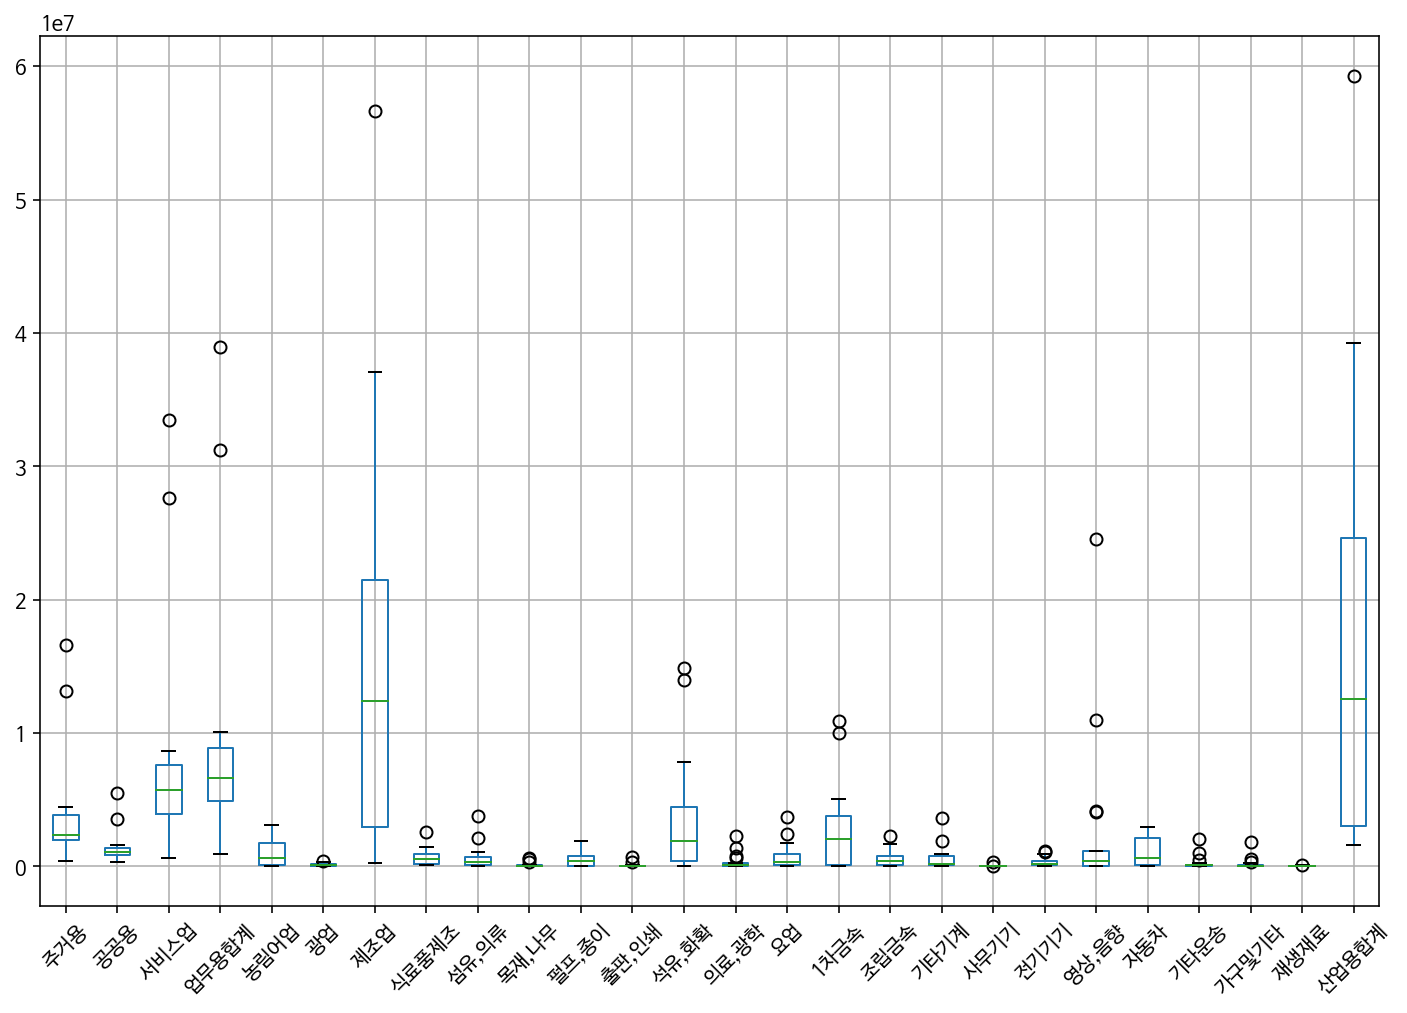

In [14]:
power.drop('합계', axis=1).boxplot(figsize=(12,8))
plt.xticks(rotation=45)
plt.show()

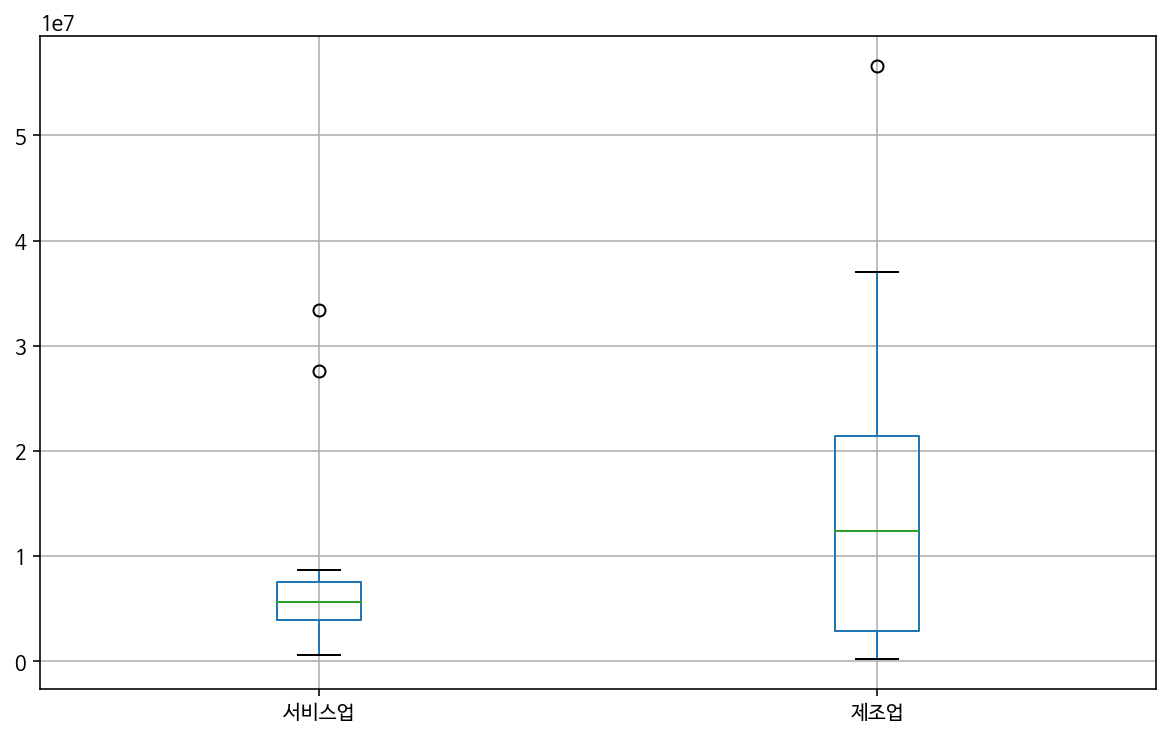

In [16]:
power[['서비스업','제조업']].boxplot(figsize=(10,6))

바 플롯 (수평형)
--

In [17]:
power = power.drop('합계', axis=1)

In [18]:
power.plot(kind='barh', figsize=(12,8), stacked=True)

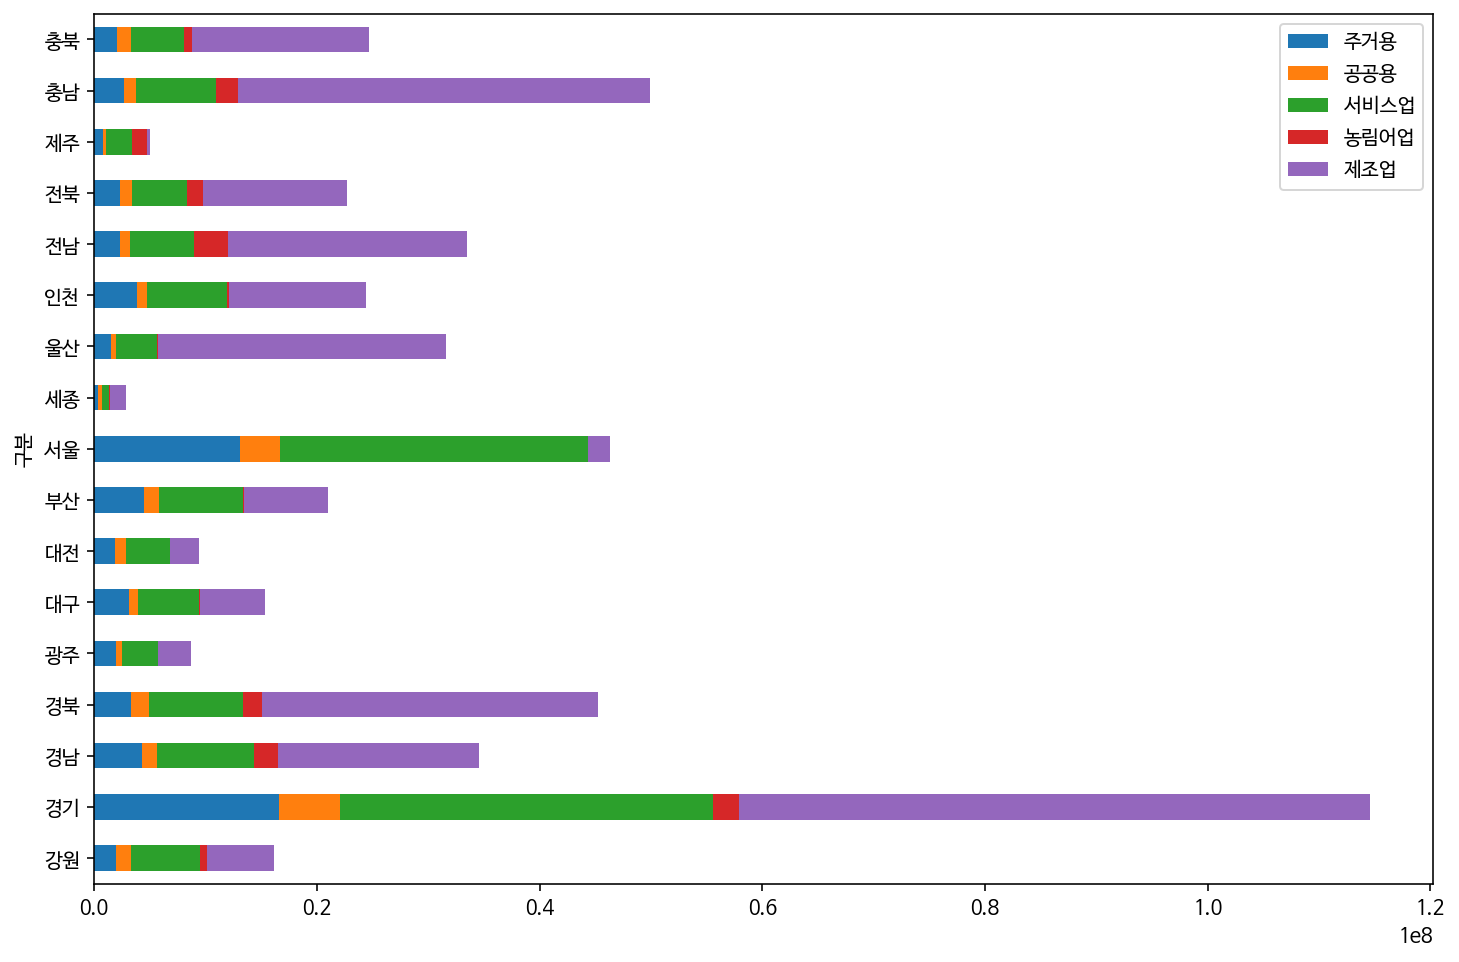

In [19]:
sample = ['주거용', '공공용', '서비스업', '농림어업', '제조업']
power[sample].plot(kind='barh', figsize=(12,8), stacked=True)

## correlation 보기 (나중에 나오는 내용이지만 살짝...)

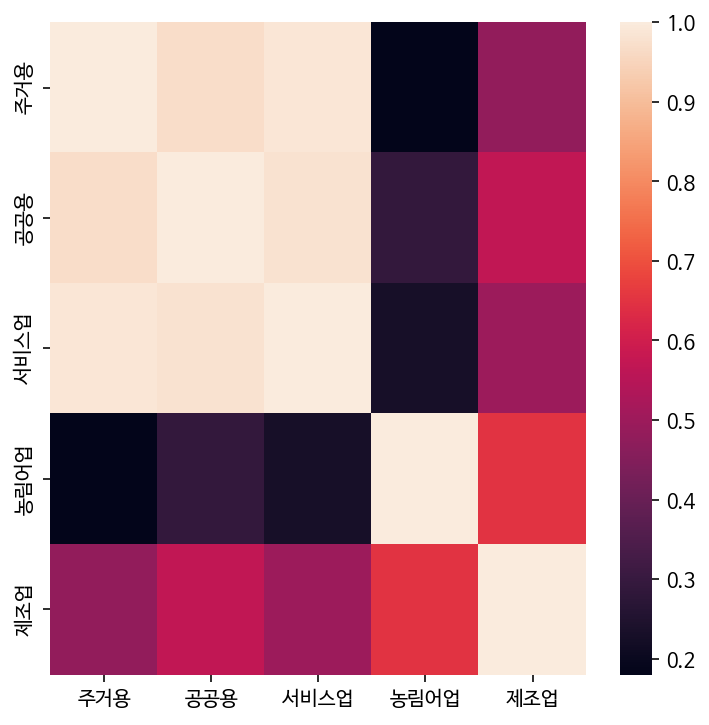

In [20]:
import seaborn as sns
sample = ['주거용', '공공용', '서비스업', '농림어업', '제조업']
power2 = power[sample]
corr = power2.corr().round(2)
plt.figure(figsize=(6,6))
sns.heatmap(corr)

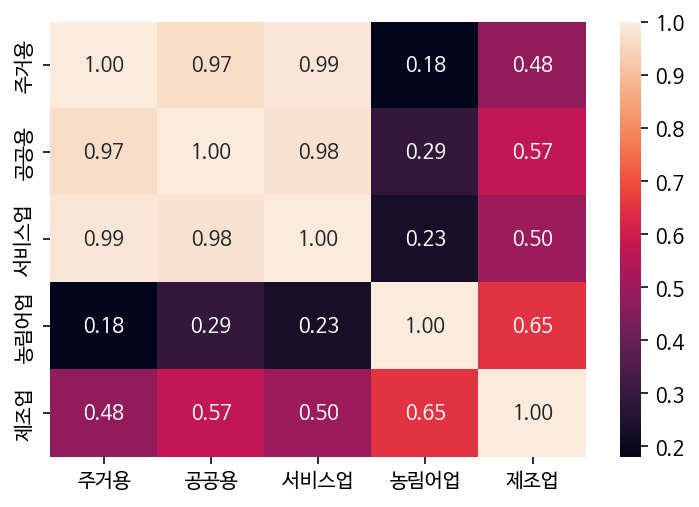

In [21]:
sns.heatmap(corr.values, cbar=True, annot =True,
            fmt='.2f', annot_kws={'size': 10},
           yticklabels=corr, xticklabels=corr)

## Back to the main ...

In [22]:
see2 = [ '서비스업','제조업']
power[see2].plot(kind='barh', figsize=(10,6), stacked=True)

In [23]:
power = power[['서비스업', '제조업']]
power.T

구분         강원        경기        경남        경북       광주       대구       대전  \
서비스업  6203749  33434551   8667737   8487402  3174973  5470438  3955921   
제조업   6002286  56603327  18053778  30115601  2910768  5862633  2608343   

구분         부산        서울       세종        울산        인천        전남        전북  \
서비스업  7582169  27647345   645424   3649386   7154416   5690659   4910318   
제조업   7512588   1918893  1502922  25883132  12367816  21453926  12965875   

구분         제주        충남        충북  
서비스업  2308732   7164439   4804638  
제조업    241537  37057955  15883448

히스토그램
--

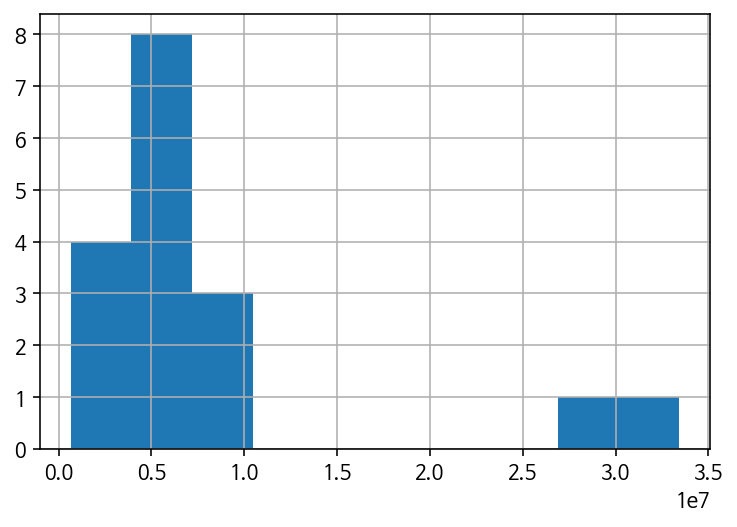

In [24]:
power['서비스업'].hist()

스캐터 플롯
--

In [25]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'])
plt.xlabel('서비스업')
plt.ylabel('제조업')

Text(0, 0.5, '제조업')

In [26]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])

In [27]:
power = power.drop(['경기', '서울'])
power

서비스업       제조업
구분                   
강원  6203749   6002286
경남  8667737  18053778
경북  8487402  30115601
광주  3174973   2910768
대구  5470438   5862633
대전  3955921   2608343
부산  7582169   7512588
세종   645424   1502922
울산  3649386  25883132
인천  7154416  12367816
전남  5690659  21453926
전북  4910318  12965875
제주  2308732    241537
충남  7164439  37057955
충북  4804638  15883448

In [28]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])